"""
This notebook references code structures and analysis ideas from
Quang-Nguyen Vo-Huynh (https://github.com/vohuynhquangnguyen).

The implementation has been independently developed and adapted
for the PG&E Energy Analytics Challenge.
"""


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_excel('./datasets/training.xlsx', sheet_name='Data')

In [ ]:
# Xóa dấu phẩy trong dữ liệu và chuyển đổi sang kiểu số
df['Load'] = pd.to_numeric(df['Load'].astype(str).str.replace(',', ''), errors='coerce')

# List temperature columns explicitly from your provided structure
# nhiệt độ ở 5 trạm.
temp_columns = ['Site-1 Temp', 'Site-2 Temp', 'Site-3 Temp', 'Site-4 Temp', 'Site-5 Temp']
# bức xạ mặt trời ở 5 trạm
GHI_columns = ['Site-1 GHI', 'Site-2 GHI', 'Site-3 GHI', 'Site-4 GHI', 'Site-5 GHI']

# Compute correlations with Load
#correlations → mối tương quan giữa Load và nhiệt độ.
correlations = {site: df[site].corr(df['Load']) for site in temp_columns}

#correlations2 → mối tương quan giữa Load và GHI.
correlations2 = {site: df[site].corr(df['Load']) for site in GHI_columns}
for site in temp_columns:
    corr = df[site].corr(df['Load'])
    print(f"Correlation between {site} and Load: {corr:.4f}")
    
# Convert to pandas Series for easy plotting
correlation_series = pd.Series(correlations)
correlation_series2 = pd.Series(correlations2)

Correlation between Site-1 Temp and Load: 0.3967
Correlation between Site-2 Temp and Load: 0.3963
Correlation between Site-3 Temp and Load: 0.4007
Correlation between Site-4 Temp and Load: 0.3963
Correlation between Site-5 Temp and Load: 0.4038


Nhận xét các hệ số tương quan trên:

* **Tất cả các giá trị đều dương (~0.39–0.40)** → nghĩa là **Load (tải tiêu thụ điện)** **tăng nhẹ khi nhiệt độ tăng**.
* Mức tương quan khoảng **0.39–0.40** cho thấy **mối quan hệ tuyến tính yếu đến trung bình**, không quá mạnh nhưng có xu hướng rõ ràng.
* **Site-5 Temp (0.4038)** có tương quan cao nhất → tức là nhiệt độ tại trạm này có **ảnh hưởng lớn nhất đến Load** so với các trạm còn lại.
* Các site còn lại có giá trị tương quan rất gần nhau → cho thấy **mẫu hình nhiệt độ giữa các site khá đồng nhất**, nên Load phản ứng tương tự theo nhiệt độ của từng site.

👉 **Tóm tắt:**

> Khi nhiệt độ tăng, Load có xu hướng tăng nhẹ. Tuy nhiên, mối quan hệ không quá mạnh — điều này có thể do Load còn phụ thuộc vào nhiều yếu tố khác (GHI, thời gian, thói quen sử dụng điện,…).


In [ ]:
#------so sánh mức độ tương đối của tương quan giữa Load và nhiệt độ tại từng trạm----#

# Take absolute values of correlations
abs_corr = correlation_series.abs()
abs_corr2 = correlation_series2.abs()

# Chuẩn hóa về tỷ lệ phần trăm tổng bằng 1- 
# Mục tiêu:
#  xem từng site đóng góp bao nhiêu phần trăm trong tổng độ tương quan của tất cả các site.
comparative_corr = abs_corr / abs_corr.sum()
comparative_corr2 = abs_corr2 / abs_corr2.sum()

**Chỉ quan tâm site nào có ảnh hưởng mạnh hơn (độ đóng góp) về mặt tương đối, bỏ qua hướng (chiều).**

Ví dụ:

```markdown
| Site   | |r| (Độ lớn tương quan) | Chuẩn hóa (Tỷ lệ đóng góp) |
|---------|--------------------------|-----------------------------|
| Site-1  | 0.40                     | 0.20                        |
| Site-2  | 0.42                     | 0.21                        |
| Site-3  | 0.38                     | 0.19                        |
| Site-4  | 0.39                     | 0.20                        |
| Site-5  | 0.41                     | 0.20                        |
| **Tổng** | —                       | **1.00**                    |

```
Mỗi site lúc này được biểu diễn như tỷ lệ phần trăm của “tổng sức ảnh hưởng” lên Load.

Ví dụ:

Nếu Site-5 Temp chiếm 22% tổng tương quan, còn Site-2 Temp chiếm 18%,

→ bạn biết rằng Site-5 có ảnh hưởng lớn hơn khoảng 4% so với Site-2.

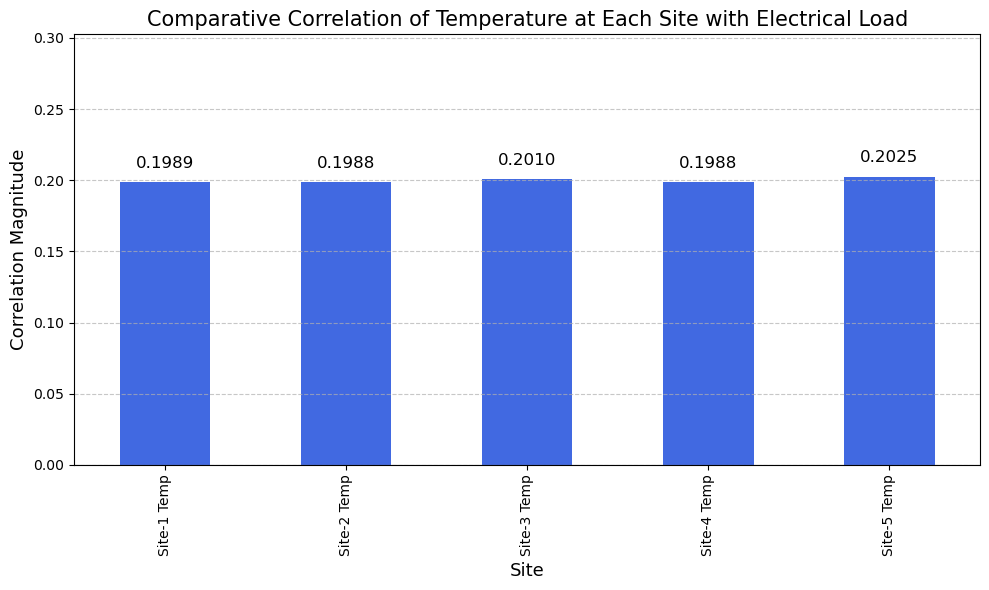

In [7]:
plt.figure(figsize=(10, 6))
comparative_corr.plot(kind='bar', color='royalblue')

# Graph Details
plt.title('Comparative Correlation of Temperature at Each Site with Electrical Load', fontsize=15)
plt.xlabel('Site', fontsize=13)
plt.ylabel('Correlation Magnitude', fontsize=13)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.axhline(0, color='gray', linewidth=0.8)
plt.ylim(0, comparative_corr.max() + 0.1)  # Ensuring scale reflects correlation range
for index, value in enumerate(comparative_corr):
    plt.text(index, value + 0.01, f'{value:.4f}', ha='center', fontsize=12)
plt.tight_layout()
plt.show()

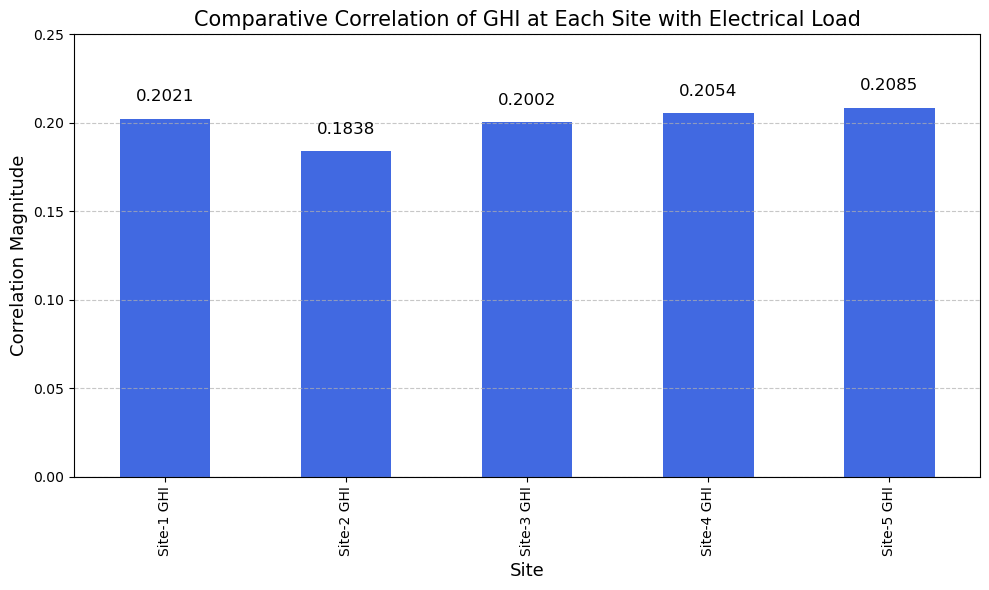

In [8]:
# so sánh mức độ tương quan giữa GHI (Global Horizontal Irradiance — bức xạ mặt trời) 
# của từng trạm với Load (tải điện).

plt.figure(figsize=(10, 6))
comparative_corr2.plot(kind='bar', color='royalblue')

# Graph Details
plt.title('Comparative Correlation of GHI at Each Site with Electrical Load', fontsize=15)
plt.xlabel('Site', fontsize=13)
plt.ylabel('Correlation Magnitude', fontsize=13)
plt.ylim(0, 0.25)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.axhline(0, color='gray', linewidth=0.8)
for index, value in enumerate(comparative_corr2):
    plt.text(index, value + 0.01, f'{value:.4f}', ha='center', fontsize=12)

plt.tight_layout()
plt.show()

Biểu đồ thể hiện mức độ tương quan giữa Load và GHI (bức xạ mặt trời) tại từng site.

Cột càng cao → site đó có tương quan mạnh hơn → bức xạ tại site đó ảnh hưởng nhiều hơn đến Load.

Nếu các cột gần bằng nhau → Load chịu ảnh hưởng tương đối đồng đều từ các site GHI.

**Đánh Giá Correlation**

In [11]:
# Xóa dấu phẩy trong dữ liệu và chuyển đổi sang kiểu số
df['Load'] = pd.to_numeric(df['Load'].astype(str).str.replace(',', ''), errors='coerce')

# List temperature columns explicitly from your provided structure
# nhiệt độ ở 5 trạm.
temp_columns = ['Site-1 Temp', 'Site-2 Temp', 'Site-3 Temp', 'Site-4 Temp', 'Site-5 Temp']
# bức xạ mặt trời ở 5 trạm
GHI_columns = ['Site-1 GHI', 'Site-2 GHI', 'Site-3 GHI', 'Site-4 GHI', 'Site-5 GHI']

# Compute correlations with Load
#correlations → mối tương quan giữa Load và nhiệt độ.
correlations = {site: df[site].corr(df['Load']) for site in temp_columns}

#correlations2 → mối tương quan giữa Load và GHI.
correlations2 = {site: df[site].corr(df['Load']) for site in GHI_columns}
for site in temp_columns:
    corr = df[site].corr(df['Load'])
    print(f"Correlation between {site} and Load: {corr:.4f}")
    
# Convert to pandas Series for easy plotting
correlation_series = pd.Series(correlations)
correlation_series2 = pd.Series(correlations2)

Correlation between Site-1 Temp and Load: 0.3967
Correlation between Site-2 Temp and Load: 0.3963
Correlation between Site-3 Temp and Load: 0.4007
Correlation between Site-4 Temp and Load: 0.3963
Correlation between Site-5 Temp and Load: 0.4038


**Phân tích tương quan giữa tải điện (Load) và nhiệt độ tại các trạm (Site-1 → Site-5)**

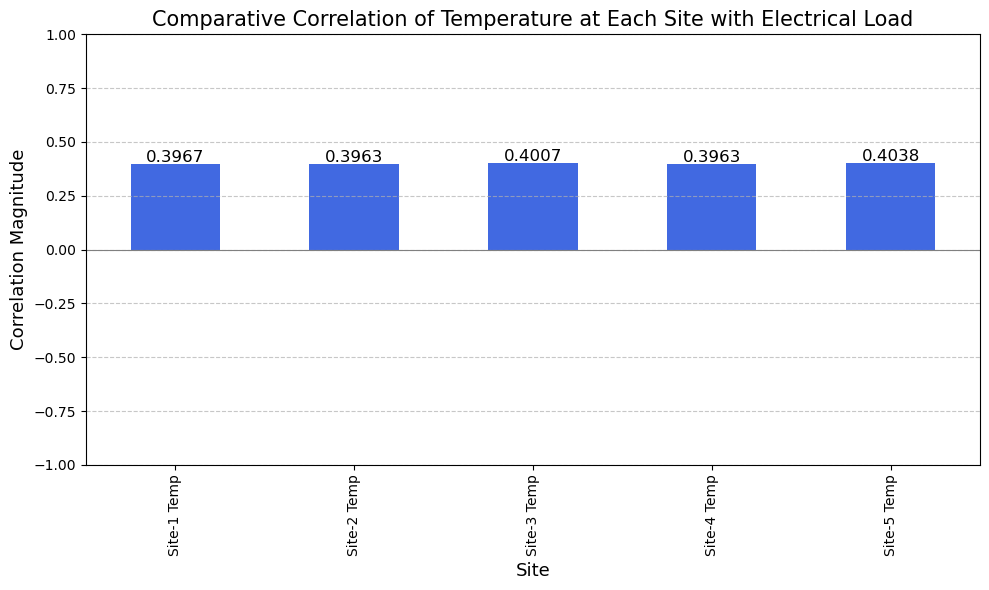

In [12]:
plt.figure(figsize=(10, 6))
correlation_series.plot(kind='bar', color='royalblue')

# Graph Details
plt.title('Comparative Correlation of Temperature at Each Site with Electrical Load', fontsize=15)
plt.xlabel('Site', fontsize=13)
plt.ylabel('Correlation Magnitude', fontsize=13)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.axhline(0, color='gray', linewidth=0.8)
plt.ylim(-1, 1)  # Ensuring scale reflects correlation range
for index, value in enumerate(correlation_series):
    plt.text(index, value + 0.01, f'{value:.4f}', ha='center', fontsize=12)
plt.tight_layout()
plt.show()

Biểu đồ cho thấy mức tương quan giữa nhiệt độ tại các trạm và phụ tải điện đều dương, dao động quanh 0.4.


Điều này chỉ ra rằng khi nhiệt độ tăng, nhu cầu sử dụng điện tăng, chủ yếu do thiết bị làm mát.


Các site có tương quan tương tự nhau, chứng tỏ dữ liệu nhiệt độ giữa các khu vực có tính đồng nhất cao.

**Tương quan giữa GHI (Global Horizontal Irradiance) và Load (tải điện) cho các trạm (Site-1 → Site-5).**

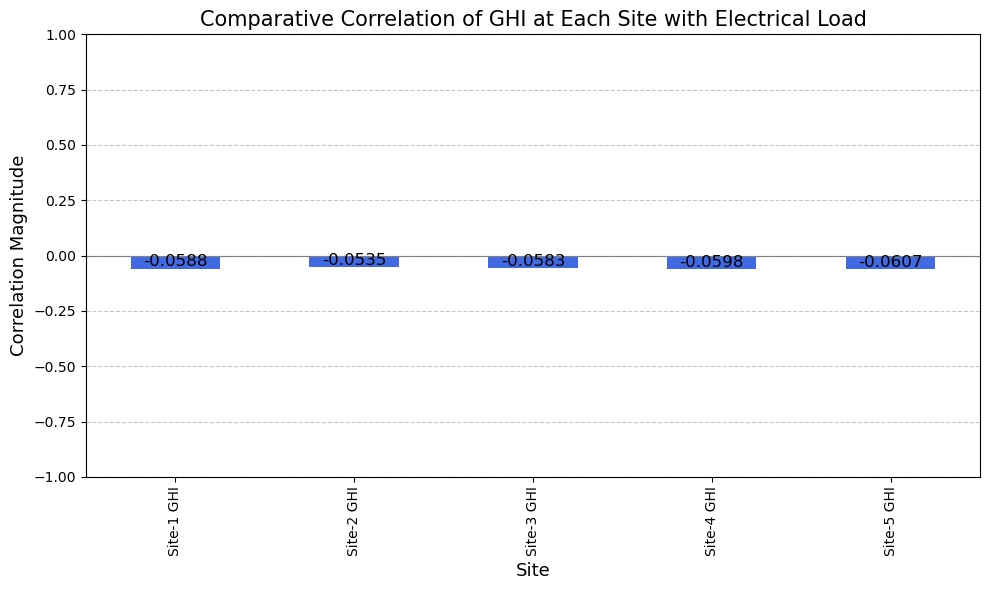

In [13]:
plt.figure(figsize=(10, 6))
correlation_series2.plot(kind='bar', color='royalblue')

# Graph Details
plt.title('Comparative Correlation of GHI at Each Site with Electrical Load', fontsize=15)
plt.xlabel('Site', fontsize=13)
plt.ylabel('Correlation Magnitude', fontsize=13)
plt.ylim(-1, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.axhline(0, color='gray', linewidth=0.8)
for index, value in enumerate(correlation_series2):
    plt.text(index, value + 0.01, f'{value:.4f}', ha='center', fontsize=12)

plt.tight_layout()
plt.show()

Nếu Load phản ánh tiêu thụ điện cho chiếu sáng, sưởi, điều hòa thì:

GHI cao → trời nắng → ít bật đèn hoặc điều hòa → tương quan âm nhẹ.

GHI thấp (trời mưa/âm u) → bật đèn nhiều hơn → tải tăng.

Hệ số tương quan tại các site có giá trị gần nhau, cho thấy ảnh hưởng của bức xạ mặt trời đến Load là tương đối đồng đều giữa các vị trí.

Giá trị tương quan có thể âm nhẹ, phản ánh rằng khi bức xạ mặt trời tăng (trời sáng), nhu cầu chiếu sáng nhân tạo giảm, dẫn đến phụ tải giảm nhẹ.



**Tranning model RandomForest**

**Tổng quan**: So sánh mức độ ảnh hưởng của nhiệt độ (Temp) và bức xạ mặt trời (GHI) tới phụ tải điện (Load), bằng cách huấn luyện các mô hình Random Forest trên từng nhóm đặc trưng riêng biệt.

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Define your feature groups clearly
features = {
     # Gồm cả Temp và GHI
    'All Features': ['Site-1 Temp', 'Site-2 Temp', 'Site-3 Temp', 'Site-4 Temp', 'Site-5 Temp',
                     'Site-1 GHI', 'Site-2 GHI', 'Site-3 GHI', 'Site-4 GHI', 'Site-5 GHI'],
    # Chỉ dùng Temp
    'Temperature Only': ['Site-1 Temp', 'Site-2 Temp', 'Site-3 Temp', 'Site-4 Temp', 'Site-5 Temp'],
    # Chỉ dùng GHI
    'GHI Only': ['Site-1 GHI', 'Site-2 GHI', 'Site-3 GHI', 'Site-4 GHI', 'Site-5 GHI']
}

y = df['Load']
models = {}
importances = {}

# Loop clearly through each feature set, training models separately
for label, feats in features.items():
    X = df[feats]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    # Train and store model clearly
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    models[label] = model
    
    # Store feature importances
    importances[label] = pd.Series(model.feature_importances_, index=feats).sort_values(ascending=False)

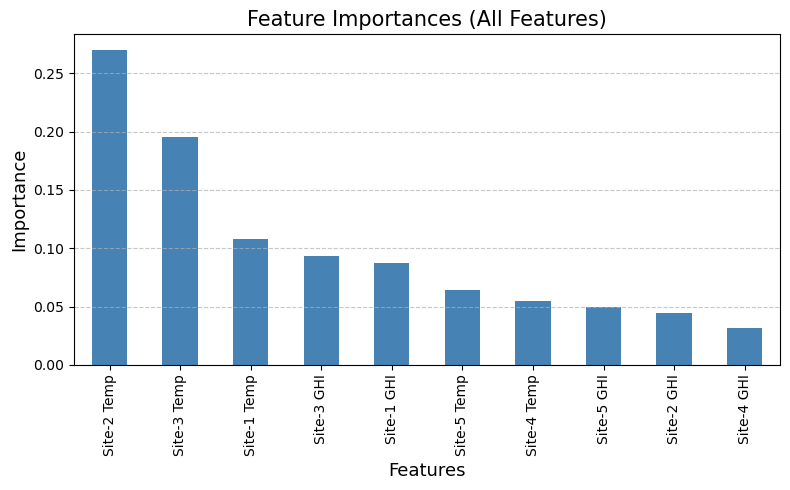

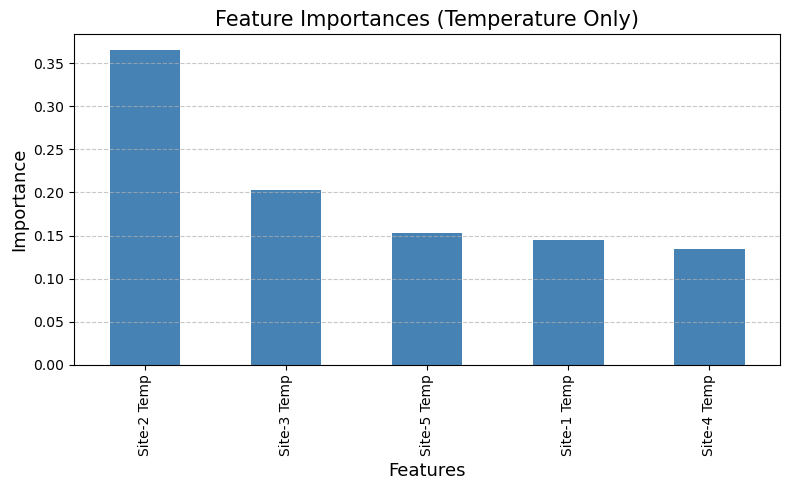

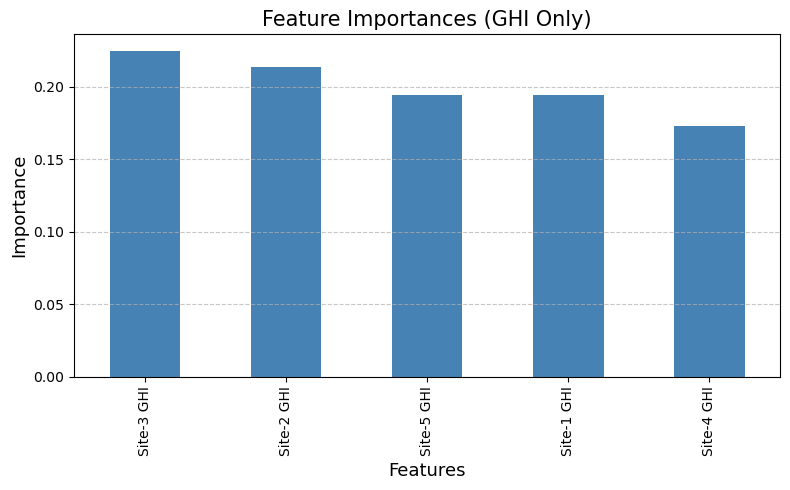

In [21]:
for label, importance in importances.items():
    plt.figure(figsize=(8, 5))
    importance.plot(kind='bar', color='steelblue')
    plt.title(f'Feature Importances ({label})', fontsize=15)
    plt.xlabel('Features', fontsize=13)
    plt.ylabel('Importance', fontsize=13)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()